In [137]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.tsa.stattools as sm
import seaborn as sns
from scipy import stats

In [138]:
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/DATA.xlsx', sheet_name = 'Zipcodes_with_crime_180830a')
data = data.set_index("zipcode")
data = data.sort_values("zipcode")

In [139]:
zipcodes = gpd.read_file('/Users/VarshiniSelvadurai/Documents/Internship/mczipcodes.shp')

In [140]:
cp = []
for index,row in data.iterrows():
    if (row["Population"] >= 0 and row["Number of Crimes"] >= 0):
        cp.append(float(row["Number of Crimes"])/float(row["Population"]))
    else:
        cp.append(-1)
data["Crime/Population"] = cp

In [142]:
house_price = data.loc[data["House Price"] >= 0] #house_price vs crime
gray_ratio = data.loc[data["Gray_ratio"] >= 0] #gray_ratio vs crime
mean_gs = data.loc[data["mean of gs"] >= 0]
sum_gs = data.loc[data["sum of values over 100 / sum of values under 100"] >= 0]
num_gs = data.loc[data["num of values over 100 / num of values under 100"] >= 0]

y = -0.001123282393845748x + 1783.0240899362834
r =  -0.15173644795724817


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


y = -0.5605225743854223x + 1118.2820621772876
r =  -0.0005655592336314002
y = 14.05772292527076x + 11.236681493661308
r =  0.19731179365194723
y = -40.09555623819241x + 1126.0473079279056
r =  -0.043309297628017086
y = -89.2648813996226x + 1128.4318941724955
r =  -0.04556941391575507


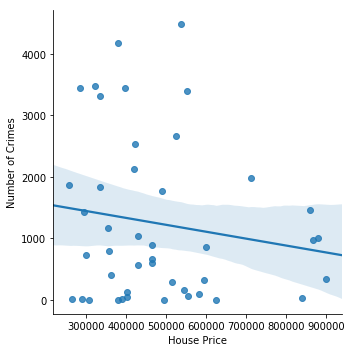

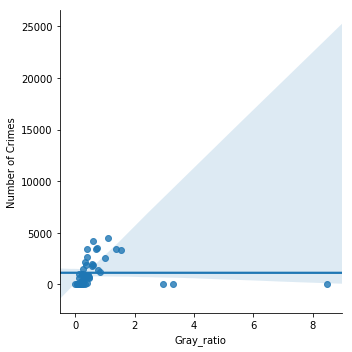

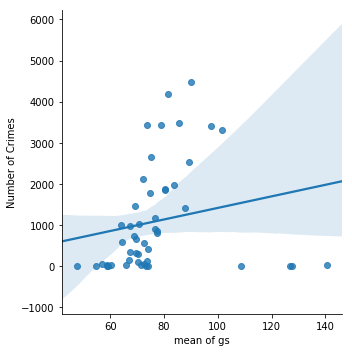

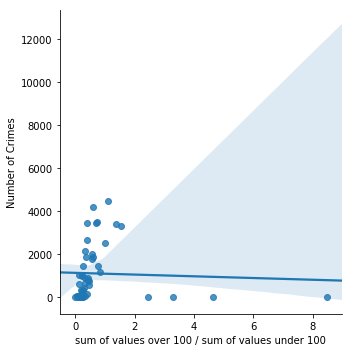

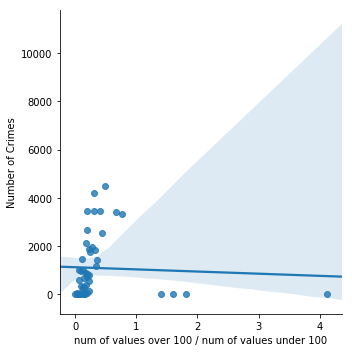

In [143]:
#CRIME
m, b, r_value, p_value, std_err = stats.linregress(house_price['House Price'],house_price['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="House Price", y="Number of Crimes", data=house_price)

m, b, r_value, p_value, std_err = stats.linregress(gray_ratio['Gray_ratio'],gray_ratio['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Gray_ratio", y="Number of Crimes", data=gray_ratio)

m, b, r_value, p_value, std_err = stats.linregress(mean_gs['mean of gs'],mean_gs['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="mean of gs", y="Number of Crimes", data=mean_gs)

m, b, r_value, p_value, std_err = stats.linregress(sum_gs['sum of values over 100 / sum of values under 100'],sum_gs['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="sum of values over 100 / sum of values under 100", y="Number of Crimes", data=sum_gs)

m, b, r_value, p_value, std_err = stats.linregress(num_gs['num of values over 100 / num of values under 100'],num_gs['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="num of values over 100 / num of values under 100", y="Number of Crimes", data=num_gs)

In [144]:
#CRIME/POPULATION
crime_pop = data.loc[data["Crime/Population"]>=0]
house_price_cp = crime_pop.loc[crime_pop["House Price"] >= 0] #house_price vs crime
gray_ratio_cp = crime_pop.loc[crime_pop["Gray_ratio"] >= 0] #gray_ratio vs crime
mean_gs_cp = crime_pop.loc[crime_pop["mean of gs"] >= 0]
sum_gs_cp = crime_pop.loc[crime_pop["sum of values over 100 / sum of values under 100"] >= 0]
num_gs_cp = crime_pop.loc[crime_pop["num of values over 100 / num of values under 100"] >= 0]

y = -2.7139283169592285e-08x + 0.055106451707866023
r =  -0.174046484177332


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


y = 0.028204691890792537x + 0.03122316344545359
r =  0.5681187604199985


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


y = 0.0015411301870595924x + -0.06921574315507649
r =  0.7293179855136998
y = 0.03444847375124836x + 0.028680485858750646
r =  0.6212959599039134
y = 0.05870039194609647x + 0.030891031174052383
r =  0.557783221708641


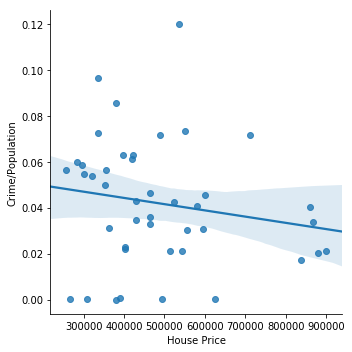

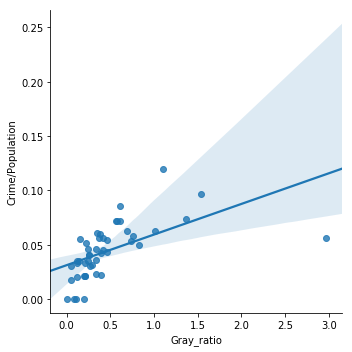

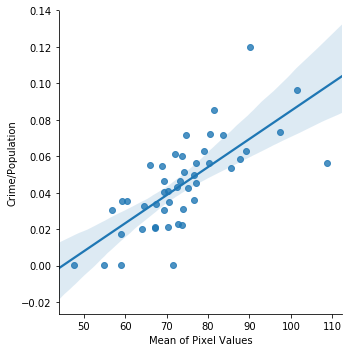

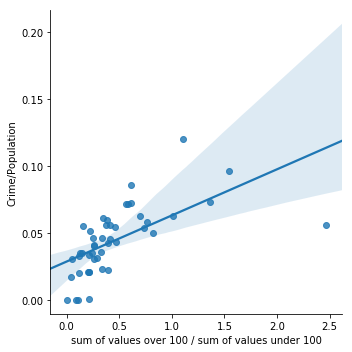

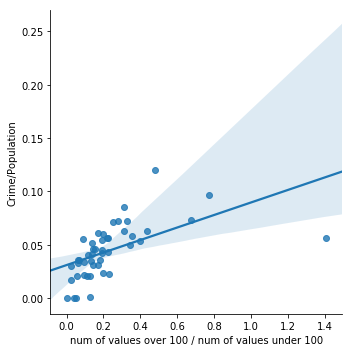

In [148]:
m, b, r_value, p_value, std_err = stats.linregress(house_price_cp['House Price'],house_price_cp['Crime/Population'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="House Price", y="Crime/Population", data=house_price_cp)
ax.savefig("!f!f!House Price.png")

m, b, r_value, p_value, std_err = stats.linregress(gray_ratio_cp['Gray_ratio'],gray_ratio_cp['Crime/Population'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Gray_ratio", y="Crime/Population", data=gray_ratio_cp)

mean_gs_cp["Mean of Pixel Values"] = mean_gs_cp["mean of gs"]
m, b, r_value, p_value, std_err = stats.linregress(mean_gs_cp['Mean of Pixel Values'],mean_gs_cp['Crime/Population'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Mean of Pixel Values", y="Crime/Population", data=mean_gs_cp)
ax.savefig("!f!f!Mean_GS.png")

m, b, r_value, p_value, std_err = stats.linregress(sum_gs_cp['sum of values over 100 / sum of values under 100'],sum_gs_cp['Crime/Population'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="sum of values over 100 / sum of values under 100", y="Crime/Population", data=sum_gs_cp)

m, b, r_value, p_value, std_err = stats.linregress(num_gs_cp['num of values over 100 / num of values under 100'],num_gs_cp['Crime/Population'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="num of values over 100 / num of values under 100", y="Crime/Population", data=num_gs_cp)

In [132]:
#CRIME 100
data_100 = data.loc[data["Number of Crimes"] >= 100]
house_price_100 = data_100.loc[data_100["House Price"] >= 0] #house_price vs crime
gray_ratio_100 = data_100.loc[data_100["Gray_ratio"] >= 0] #gray_ratio vs crime
mean_gs_100 = data_100.loc[data_100["mean of gs"] >= 0]
sum_gs_100 = data_100.loc[data_100["sum of values over 100 / sum of values under 100"] >= 0]
num_gs_100 = data_100.loc[data_100["num of values over 100 / num of values under 100"] >= 0]

y = -0.0017392265614063949x + 2494.1890343627683
r =  -0.24645333926886248


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


y = 2498.814071107636x + 371.070730454275
r =  0.6766961153907909
y = 96.90970169175202x + -5777.661017802651
r =  0.692542680805252
y = 2498.814071107636x + 371.070730454275
r =  0.6766961153907909
y = 5246.929503792632x + 340.07842801012725
r =  0.6721885170171792


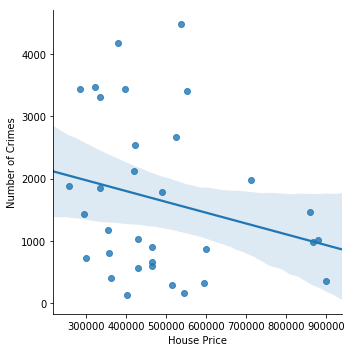

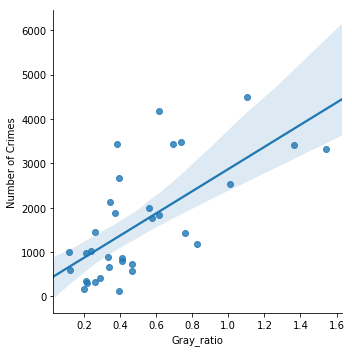

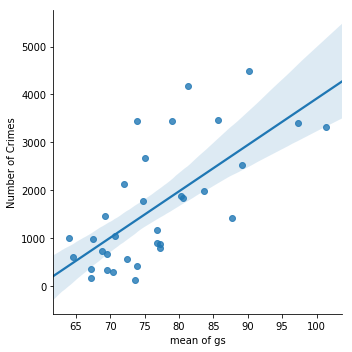

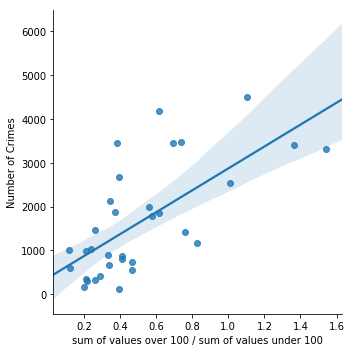

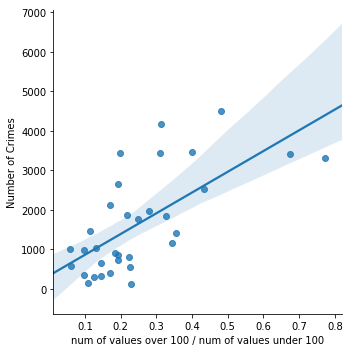

In [133]:
m, b, r_value, p_value, std_err = stats.linregress(house_price_100['House Price'],house_price_100['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="House Price", y="Number of Crimes", data=house_price_100)

m, b, r_value, p_value, std_err = stats.linregress(gray_ratio_100['Gray_ratio'],gray_ratio_100['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Gray_ratio", y="Number of Crimes", data=gray_ratio_100)

m, b, r_value, p_value, std_err = stats.linregress(mean_gs_100['mean of gs'],mean_gs_100['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="mean of gs", y="Number of Crimes", data=mean_gs_100)

m, b, r_value, p_value, std_err = stats.linregress(sum_gs_100['sum of values over 100 / sum of values under 100'],sum_gs_100['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="sum of values over 100 / sum of values under 100", y="Number of Crimes", data=sum_gs_100)

m, b, r_value, p_value, std_err = stats.linregress(num_gs_100['num of values over 100 / num of values under 100'],num_gs_100['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="num of values over 100 / num of values under 100", y="Number of Crimes", data=num_gs_100)

In [135]:
crime_pop_100 = data_100.loc[data_100["Crime/Population"]>=0]
house_price_100_cp = crime_pop_100.loc[crime_pop_100["House Price"] >= 0] #house_price vs crime
gray_ratio_100_cp = crime_pop_100.loc[crime_pop_100["Gray_ratio"] >= 0] #gray_ratio vs crime
mean_gs_100_cp = crime_pop_100.loc[crime_pop_100["mean of gs"] >= 0]
sum_gs_100_cp = crime_pop_100.loc[crime_pop_100["sum of values over 100 / sum of values under 100"] >= 0]
num_gs_100_cp = crime_pop_100.loc[crime_pop_100["num of values over 100 / num of values under 100"] >= 0]

y = -0.0017392265614063949x + 2494.1890343627683
r =  -0.24645333926886248


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


y = 2498.814071107636x + 371.070730454275
r =  0.6766961153907909
y = 96.90970169175202x + -5777.661017802651
r =  0.692542680805252
y = 2498.814071107636x + 371.070730454275
r =  0.6766961153907909
y = 5246.929503792632x + 340.07842801012725
r =  0.6721885170171792


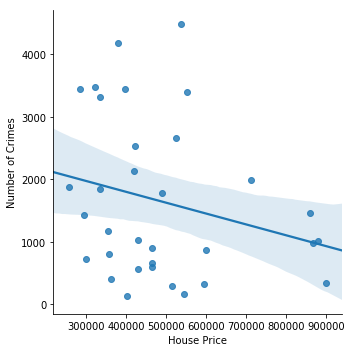

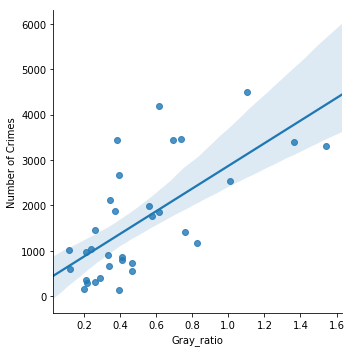

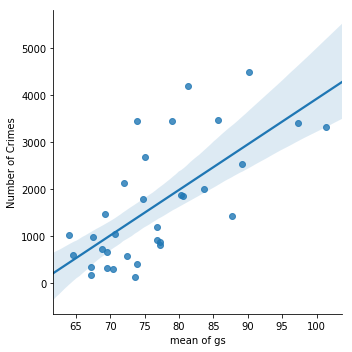

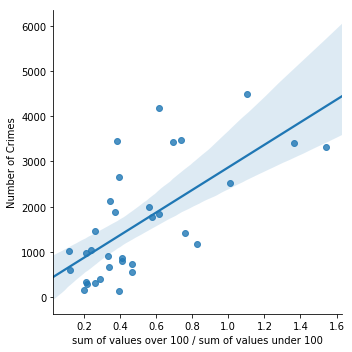

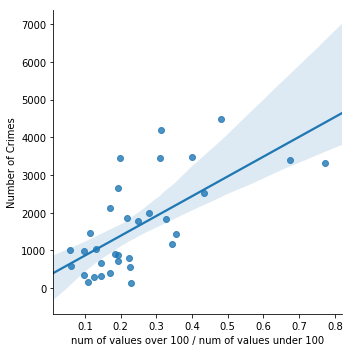

In [136]:
m, b, r_value, p_value, std_err = stats.linregress(house_price_100_cp['House Price'],house_price_100_cp['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="House Price", y="Number of Crimes", data=house_price_100_cp)

m, b, r_value, p_value, std_err = stats.linregress(gray_ratio_100_cp['Gray_ratio'],gray_ratio_100_cp['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Gray_ratio", y="Number of Crimes", data=gray_ratio_100_cp)

m, b, r_value, p_value, std_err = stats.linregress(mean_gs_100_cp['mean of gs'],mean_gs_100_cp['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="mean of gs", y="Number of Crimes", data=mean_gs_100_cp)

m, b, r_value, p_value, std_err = stats.linregress(sum_gs_100_cp['sum of values over 100 / sum of values under 100'],sum_gs_100_cp['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="sum of values over 100 / sum of values under 100", y="Number of Crimes", data=sum_gs_100_cp)

m, b, r_value, p_value, std_err = stats.linregress(num_gs_100_cp['num of values over 100 / num of values under 100'],num_gs_100_cp['Number of Crimes'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="num of values over 100 / num of values under 100", y="Number of Crimes", data=num_gs_100_cp)

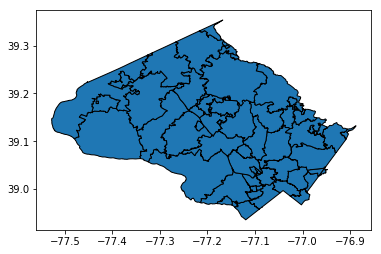

In [178]:
zipcodes.plot(figsize = (6,12),edgecolor = 'black')

In [163]:
p = [0 for i in range(0,len(zipcodes))]
c = [0 for i in range(0,len(zipcodes))]
h = [0 for i in range(0,len(zipcodes))]
g = [0 for i in range(0,len(zipcodes))]

zipcodes.sort_values("zipcode")

for index,row in data.iterrows():
    for index1, row1 in zipcodes.iterrows():
        if int(index) == int(row1["zipcode"]):
            p[index1] = row["Population"]
            c[index1] = row["Number of Crimes"]
            h[index1] = row["House Price"]
            g[index1] = row["mean of gs"]
zipcodes["Population"] = p
zipcodes["Crime Frequency"] = c
zipcodes["House Price"] = h
zipcodes["Mean of Pixel Value"] = g 

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


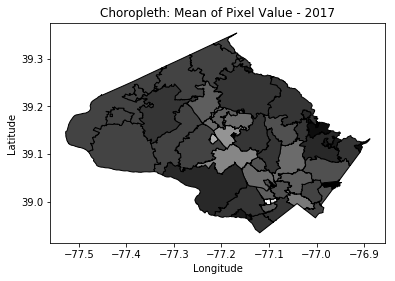

In [169]:
ay = zipcodes.plot(column = 'Mean of Pixel Value', cmap = "gray", scheme = 'equal_interval', k = 20, legend = False,figsize = (6,12),edgecolor = 'black')
ay.set_title("Choropleth: Mean of Pixel Value - 2017")
ay.set_xlabel("Longitude")
ay.set_ylabel("Latitude")
fig = ay.get_figure()
fig.savefig("!!Mean of Pixel Value")

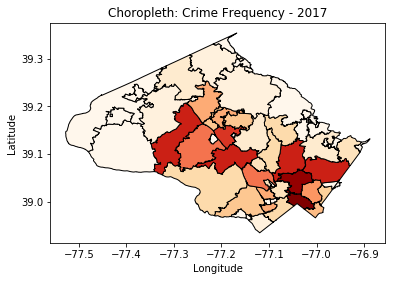

In [170]:
ay = zipcodes.plot(column = 'Crime Frequency', cmap = "OrRd", scheme = 'equal_interval', k = 20, legend = False,figsize = (6,12),edgecolor = 'black')
ay.set_title("Choropleth: Crime Frequency - 2017")
ay.set_xlabel("Longitude")
ay.set_ylabel("Latitude")
fig = ay.get_figure()
fig.savefig("!!Crime Frequency")

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


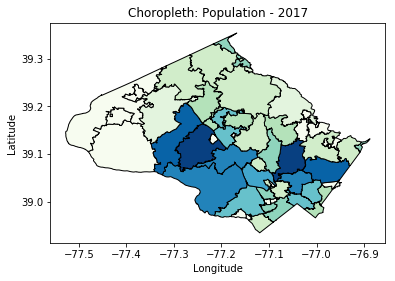

In [179]:
ay = zipcodes.plot(column = 'Population', cmap = "GnBu", scheme = 'equal_interval', k = 10, legend = False,figsize = (6,12),edgecolor = 'black')
ay.set_title("Choropleth: Population - 2017")
ay.set_xlabel("Longitude")
ay.set_ylabel("Latitude")
fig = ay.get_figure()
fig.savefig("!!PoPulation")

In [173]:
print(zipcodes)

             mail_city    shape_area  zipcode     shape_leng  \
0            GLEN ECHO  9.810937e+06  20812.0   14504.506513   
1             BETHESDA  1.175655e+08  20816.0   58716.124845   
2           CABIN JOHN  3.599683e+07  20818.0   31103.235156   
3             BETHESDA  2.547457e+04  20894.0    1298.401522   
4             BETHESDA  7.448763e+02  20892.0     140.742936   
5             BETHESDA  7.436286e+03  20892.0    1169.217673   
6             BETHESDA  2.682760e+03  20814.0     502.857722   
7             BETHESDA  2.114115e+03  20894.0     337.702225   
8             BETHESDA  3.187062e+00  20814.0       7.162744   
9             BETHESDA  4.783733e+07  20814.0   46411.687688   
10         TAKOMA PARK  6.520920e+07  20912.0   51232.065342   
11            BETHESDA  2.148833e+04  20814.0     950.506704   
12            BETHESDA  3.898458e+02  20814.0      94.393758   
13            BETHESDA  1.202277e+04  20814.0     590.370592   
14            BETHESDA  1.191660e+05  20